In [1]:
require(dplyr)
require(reshape2)
require(ggplot2)
require(GGally)

Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: reshape2
Loading required package: ggplot2
Loading required package: GGally

Attaching package: ‘GGally’

The following object is masked from ‘package:dplyr’:

    nasa



In [2]:
texas.rw <- data.frame(graph='texas', method='rw', 
                       read.csv('sampled/roads_texas_rw.csv', header = T))
texas.ff <- data.frame(graph='texas', method='ff', 
                       read.csv('sampled/roads_texas_ff.csv', header = T))
facebook.rw <- data.frame(graph='facebook', method='rw', 
                          read.csv('sampled/facebook_rw.csv', header = T))
facebook.ff <- data.frame(graph='facebook', method='ff', 
                          read.csv('sampled/facebook_ff.csv', header = T))

In [3]:
data <- rbind(texas.rw, texas.ff, facebook.rw, facebook.ff)
str(data)

'data.frame':	400 obs. of  10 variables:
 $ graph                        : Factor w/ 2 levels "texas","facebook": 1 1 1 1 1 1 1 1 1 1 ...
 $ method                       : Factor w/ 2 levels "rw","ff": 1 1 1 1 1 1 1 1 1 1 ...
 $ edges                        : int  189443 183858 199136 187796 187837 192674 177525 194044 180480 192068 ...
 $ triangles                    : int  6790 6593 7109 7974 7850 8032 6632 8076 6466 7300 ...
 $ mean_triangles               : num  0.146 0.142 0.153 0.172 0.169 ...
 $ density                      : num  1.95e-05 1.89e-05 2.05e-05 1.93e-05 1.93e-05 ...
 $ mean_degree                  : num  2.72 2.64 2.86 2.7 2.7 ...
 $ components                   : int  1 1 1 1 1 1 1 2 1 1 ...
 $ mean_component_size          : num  139338 139338 139338 139338 139338 ...
 $ global_clustering_coefficient: num  0.0525 0.0533 0.0496 0.062 0.0605 ...


In [4]:
analyzed.data.ok <- data %>% 
    select(graph, method, density, global_clustering_coefficient) %>%
    melt(id.vars = c('graph', 'method'))

ground.truth.ok <- data.frame(graph = c('facebook', 'texas'),
                              density = c(0.0004023, 0.0000002),
                              global_clustering_coefficient = c(0.1477, 0.0602)) %>%
    melt(id.vars = c('graph'))

plot.ok <- ggplot(analyzed.data.ok, aes(x=method, y=value)) + 
    facet_wrap(~variable, scales='free_y') + 
    geom_jitter(aes(color = graph), alpha=0.5) + 
    geom_hline(data = ground.truth.ok, aes(yintercept = value, color = graph))

In [5]:
analyzed.data.off <- data %>% 
    select(graph, method, mean_triangles, components, mean_degree) %>%
    melt(id.vars = c('graph', 'method'))

ground.truth.off <- data.frame(graph = c('facebook', 'texas'),
                           #edges = c(817035, 1921660),
                           #triangles = c(3500542, 82869),
                           mean_triangles = c(164.780, 0.178),
                           mean_degree = c(25.640, 2.758),
                           #density = c(0.0004023, 0.0000002),
                           components = c(144, 13890)) %>%
                           #mean_component_size = c(442.576, 100.315),
                           #global_clustering_coefficient = c(0.1477, 0.0602)
                           #     ) %>%
    melt(id.vars = c('graph'))

plot.off <- ggplot(analyzed.data.off, aes(x=method, y=log(value))) + 
    facet_wrap(~variable, scales='free_y') + 
    geom_jitter(aes(color = graph), alpha=0.5) + 
    geom_hline(data = ground.truth.off, aes(yintercept = log(value), color = graph))

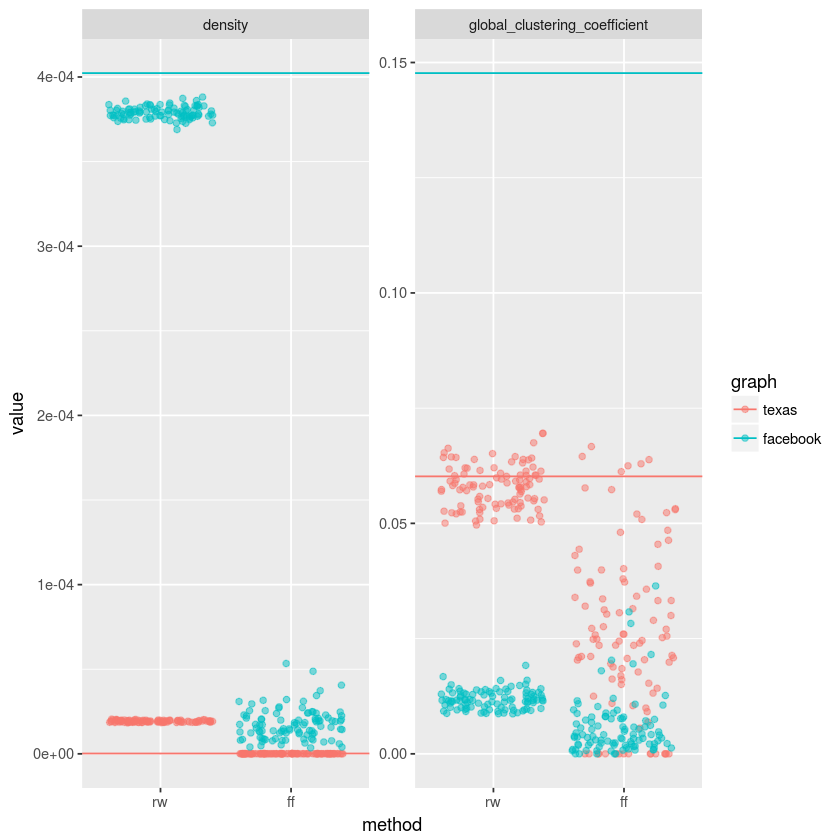

In [18]:
#pdf("slides/fig/sampled-ok.pdf", 4, 5)
plot.ok #+ theme(legend.position = 'none')
#dev.off()

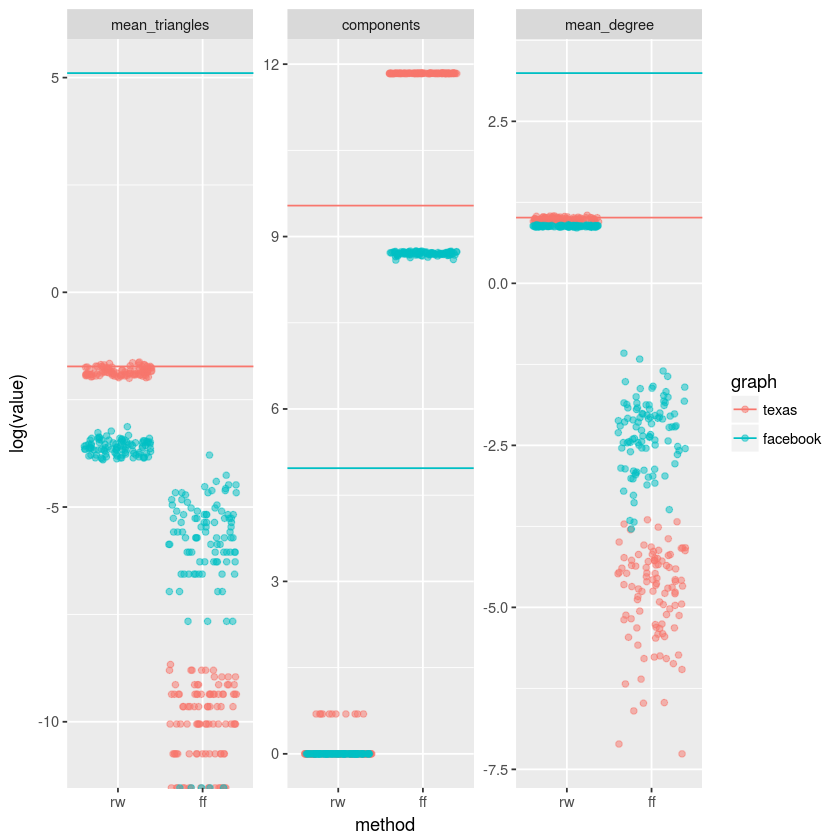

In [19]:
#pdf("slides/fig/sampled-off.pdf", 6, 5)
plot.off
#dev.off()

In [23]:
kruskal.test(density ~ graph, data=filter(data, method == 'ff'))


	Kruskal-Wallis rank sum test

data:  density by graph
Kruskal-Wallis chi-squared = 149.26, df = 1, p-value < 2.2e-16


In [24]:
kruskal.test(global_clustering_coefficient ~ graph, data=filter(data, method == 'ff'))


	Kruskal-Wallis rank sum test

data:  global_clustering_coefficient by graph
Kruskal-Wallis chi-squared = 58.744, df = 1, p-value = 1.796e-14


In [25]:
kruskal.test(mean_triangles ~ graph, data=filter(data, method == 'ff'))


	Kruskal-Wallis rank sum test

data:  mean_triangles by graph
Kruskal-Wallis chi-squared = 123.55, df = 1, p-value < 2.2e-16


In [26]:
kruskal.test(components ~ graph, data=filter(data, method == 'rw'))


	Kruskal-Wallis rank sum test

data:  components by graph
Kruskal-Wallis chi-squared = 11.582, df = 1, p-value = 0.0006659
